### 模型的泛化能力

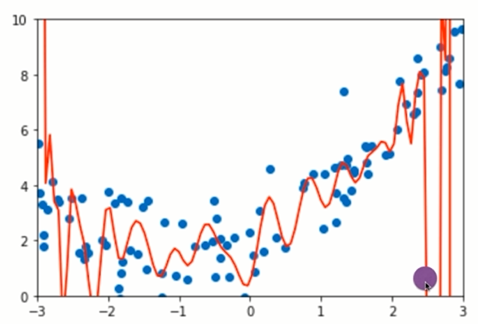

比如说上面这种情况，在本次的实验当中，拟合的比较好，但是当新的数据来的时候可能不是那么的理想，也即是说泛化能力比较弱，面对新的数据比较差。这么模型的目的不是为的不是最大程度的拟合这条曲线，而是为了模型能够很好的预测出新的数据而已

> 为了将上面的数据很好的利用，就用到了将数据的分离，也就是说数据集和测试集

### train test split的意义

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(88)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,              1)
y = 0.5 * x ** 2 + x + np.random.normal(0, 1, size=100)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
from turing.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

3.052798592853244

### 使用多项式回归

In [4]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.6078235647508248

In [6]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

1.30701703066828

degree=10值变大了，说明感化能力变弱了

In [7]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

354192128048221.44

这个的误差已经超过亿，说明预测错误厉害，就是说，面对新的数据的时候，与测结果的能力时极差的

### 测试数据集的意义

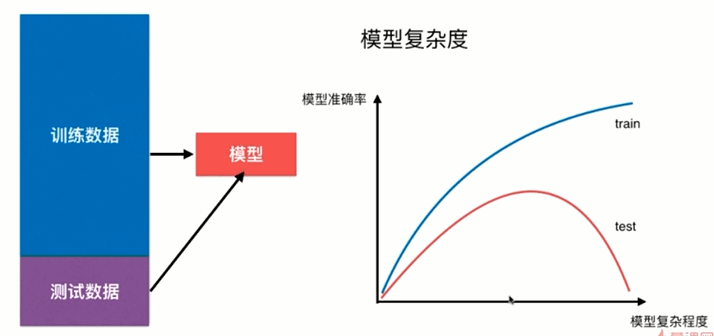